In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from pipeline_utils import scrape_json_qs, scrape_all_pages_qs, transform_and_merge_qs, scrape_json_the, transform_the, merge_all, load, transform_cwur, extract

## **Scrape JSON (Sumber 1)**

In [2]:
url_QS = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/en/3897789.txt?rsn1ph'

In [3]:
df1 = scrape_json_qs(url_QS, 500)

In [4]:
df1.head(10)

,Id,Rank,University,Score,Country,City,Region
0,1,1,Massachusetts Institute of Technology (MIT),100,United States,Cambridge,North America
1,2,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe
2,3,3,University of Oxford,98.9,United Kingdom,Oxford,Europe
3,4,4,Harvard University,98.3,United States,Cambridge,North America
4,5,5,Stanford University,98.1,United States,Stanford,North America
5,6,6,Imperial College London,97.8,United Kingdom,London,Europe
6,7,7,ETH Zurich,93.3,Switzerland,Zürich,Europe
7,8,8,National University of Singapore (NUS),92.7,Singapore,Singapore,Asia
8,9,9,UCL,92.4,United Kingdom,London,Europe
9,10,10,"University of California, Berkeley (UCB)",90.4,United States,Berkeley,North America


In [5]:
df1.shape

(500, 7)

## **Scrape Web (Sumber 2)**

In [3]:
df2 = scrape_all_pages_qs(url_QS, 500)

Getting data from https://www.topuniversities.com/universities/massachusetts-institute-technology-mit (0)
Getting data from https://www.topuniversities.com/universities/university-cambridge (1)
Getting data from https://www.topuniversities.com/universities/university-oxford (2)
Getting data from https://www.topuniversities.com/universities/harvard-university (3)
Getting data from https://www.topuniversities.com/universities/stanford-university (4)
Getting data from https://www.topuniversities.com/universities/imperial-college-london (5)
Getting data from https://www.topuniversities.com/universities/eth-zurich (6)
Getting data from https://www.topuniversities.com/universities/national-university-singapore-nus (7)
Getting data from https://www.topuniversities.com/universities/ucl (8)
Getting data from https://www.topuniversities.com/universities/university-california-berkeley-ucb (9)
Getting data from https://www.topuniversities.com/universities/university-chicago (10)
Getting data from 

In [5]:
df2.head()

,Id,Ranking,University Name,SAT,TOEFL,,IELTS,ATAR,International Baccalaureate,Own admission test,GPA,GMAT,GRE,Cambridge CAE Advanced,PTE Academic,ACT,Bachelor GPA,A-levels,AP
0,1,#1,Massachusetts Institute of Technology (MIT),1520+,100+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,#2,University of Cambridge,1460+,100+,,7+,98.5+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,#3,University of Oxford,1470+,100+,,7+,98.5+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,#4,Harvard University,1470+,80+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,#5,Stanford University,1420+,101+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Transformasi dan Menggabungkan Sumber 1 dengan Sumber 2**

In [3]:
temp_merged_df = transform_and_merge_qs(df1, df2)

d:\DATA\Semester-5\RekayasaData\tugasAkhir\pipeline_utils.py:190: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_merged_df['University'] = temp_merged_df['University'].str.replace(r'\([^)]*\)', '').str.strip()
d:\DATA\Semester-5\RekayasaData\tugasAkhir\pipeline_utils.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_merged_df['TOEFL'].loc[temp_merged_df['TOEFL'] > 200] = np.nan


In [4]:
temp_merged_df.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN


## **Scrape JSON (Sumber 3)**

In [3]:
url_THE = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2024_0__91239a4509dc50911f1949984e3fb8c5.json'

headers_THE = {
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Mobile Safari/537.36'
}

In [4]:
df3 = scrape_json_the(url_THE, headers_THE, 500)

## **Transformasi Sumber 3**

In [6]:
df3 = transform_the(df3)

In [7]:
df3.head()

,University,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count
0,University of Oxford,21750,0.42,49.0,51.0,32
1,Stanford University,14517,0.23,47.0,53.0,33
2,Massachusetts Institute of Technology,11085,0.33,41.0,59.0,28
3,Harvard University,20050,0.25,51.0,49.0,34
4,University of Cambridge,20565,0.38,48.0,52.0,33


## **Merge Dataframe 1, 2, 3**

In [ ]:
temp_merged_df_1_2_3 = merge_all(temp_merged_df, df3)

In [ ]:
temp_merged_df_1_2_3.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN,11085.0,0.33,41.0,59.0,28.0
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0,20565.0,0.38,48.0,52.0,33.0
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0,21750.0,0.42,49.0,51.0,32.0
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN,20050.0,0.25,51.0,49.0,34.0
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN,14517.0,0.23,47.0,53.0,33.0


## **Scrape Web (Sumber 4)**
#### **Kode scraping ada pada file cwur.py**

In [ ]:
df4 = extract('cwur_data.csv')

## **Transform Sumber 4**

In [ ]:
df4 = transform_cwur(df4)

## **Merge All Dataframe**

In [ ]:
merged_all_df = merge_all(temp_merged_df_1_2_3, df4)

In [ ]:
merged_all_df.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count,Alumni Employability Rank
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN,11085.0,0.33,41.0,59.0,28.0,12
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0,20565.0,0.38,48.0,52.0,33.0,25
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0,21750.0,0.42,49.0,51.0,32.0,27
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN,20050.0,0.25,51.0,49.0,34.0,1
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN,14517.0,0.23,47.0,53.0,33.0,4


## **Load Final Data**

In [ ]:
load(merged_all_df, 'final_all_data.csv')

## **EDA (Daftar Pertanyaan)**
- Benua, negara dan kota apa yang paling banyak memiliki universitas di daftar top 500?
- Apakah ada korelasi antara skor TOEFL dan IELTS terhadap ranking universitas?
- Berapa skor TOEFL dan IELTS mahasiswa yang diterima di universitas top 500?
- Bagaimana relasi antara jumlah mahasiswa dengan ranking dari universitas?
- Apakah ranking universitas berpengaruh terhadap jumlah mahasiswa asing?
- Bagaimana distribusi jumlah mahasiswa di universitas top 500?
- Bagaimana persebaran mahasiswa laki-laki dan perempuan berdasarkan negara?
- Bagaimana persebaran mahasiswa laki-laki dan perempuan pada universitas top 500 di dunia?
- Apakah universitas rankingnya tinggi memiliki jumlah prodi lebih banyak?
- Berapa minimal skor akreditasi yang harus didapat oleh universitas agar masuk ke daftar top 500?
- Benua apa yang memiliki rata-rata skor akreditasi tertinggi?
- Apa saja universitas di Indonesia yang masuk ke daftar top 500?
- Benua dan negara apa yang mahasiswanya memiliki skor TOEFL dan IELTS tertinggi?
- Benua apa yang memiliki rata-rata mahasiswa asing terbanyak?
- Bagaimana distribusi peringkat kelayakan kerja alumni pada universitas top 500?
- Bagaimana korelasi antara peringkat kelayakan kerja alumni dengan peringkat universitas?
- Negara apa yang memiliki rata-rata peringkat kelayakan kerja alumni tertinggi?

In [15]:
df = pd.read_csv('final_all_data.csv')

In [3]:
sns.set_palette("viridis")

Benua, negara dan kota apa yang paling banyak memiliki universitas di daftar top 500?

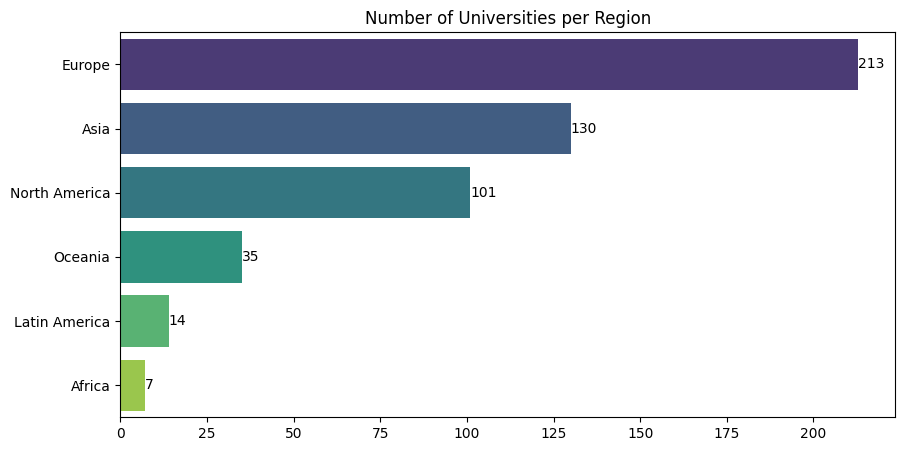

In [5]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.values, y=region_counts.index)

for index, value in enumerate(region_counts.values):
    plt.text(value, index, str(value), va='center')

plt.title('Number of Universities per Region')

plt.show()

Apakah ada korelasi antara skor TOEFL dan IELTS terhadap ranking universitas?

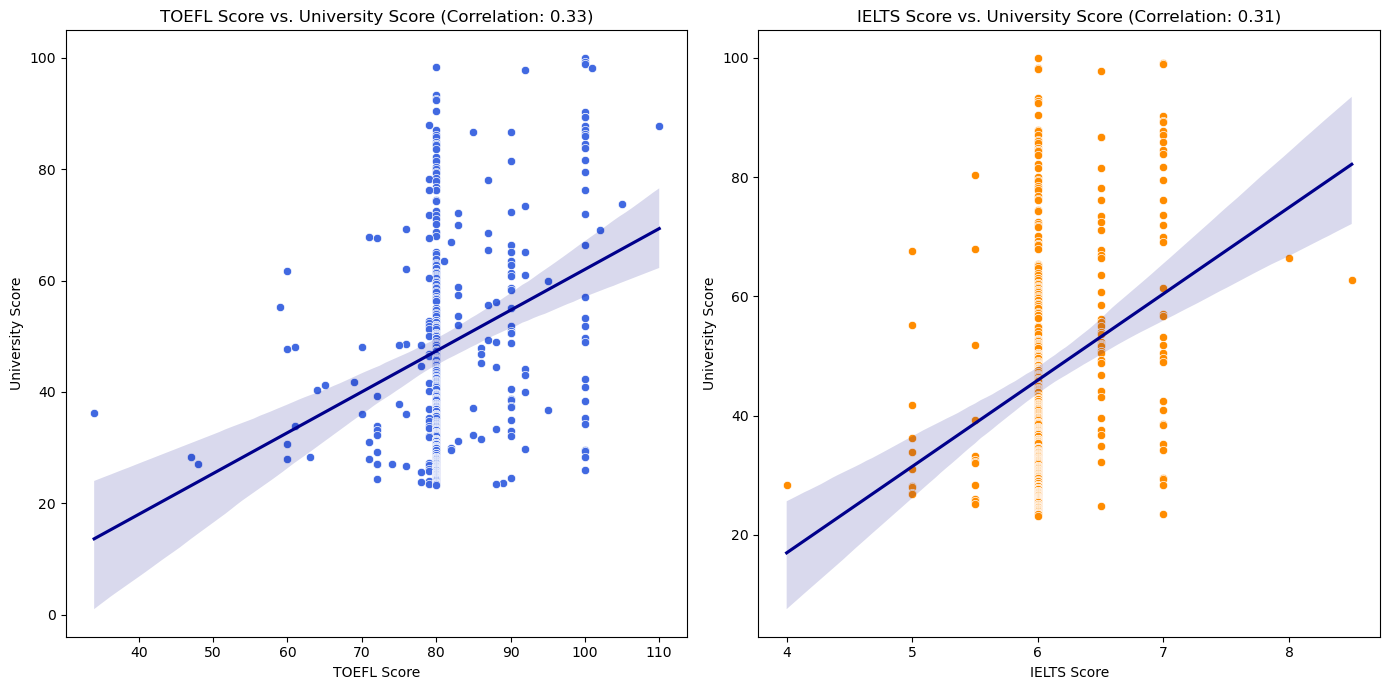

In [42]:
df_correlation = df.copy()

df_correlation['TOEFL'].fillna(df_correlation['TOEFL'].median(), inplace=True)
df_correlation['IELTS'].fillna(df_correlation['IELTS'].median(), inplace=True)

correlation_toefl_uni_score = pearsonr(df_correlation['TOEFL'], df_correlation['Score'])
correlation_ielts_uni_score = pearsonr(df_correlation['IELTS'], df_correlation['Score'])

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

scatter_toefl = sns.scatterplot(data=df_correlation, x='TOEFL', y='Score', ax=axes[0], color='royalblue')
sns.regplot(x='TOEFL', y='Score', data=df, scatter=False, ax=scatter_toefl.axes, color='darkblue')
axes[0].set_title(f'TOEFL Score vs. University Score (Correlation: {correlation_toefl_uni_score[0]:.2f})')
axes[0].set_xlabel('TOEFL Score')
axes[0].set_ylabel('University Score')

scatter_ielts = sns.scatterplot(data=df_correlation, x='IELTS', y='Score', ax=axes[1], color='darkorange')
sns.regplot(x='IELTS', y='Score', data=df, scatter=False, ax=scatter_ielts.axes, color='darkblue')
axes[1].set_title(f'IELTS Score vs. University Score (Correlation: {correlation_ielts_uni_score[0]:.2f})')
axes[1].set_xlabel('IELTS Score')
axes[1].set_ylabel('University Score')

plt.tight_layout()

plt.show()

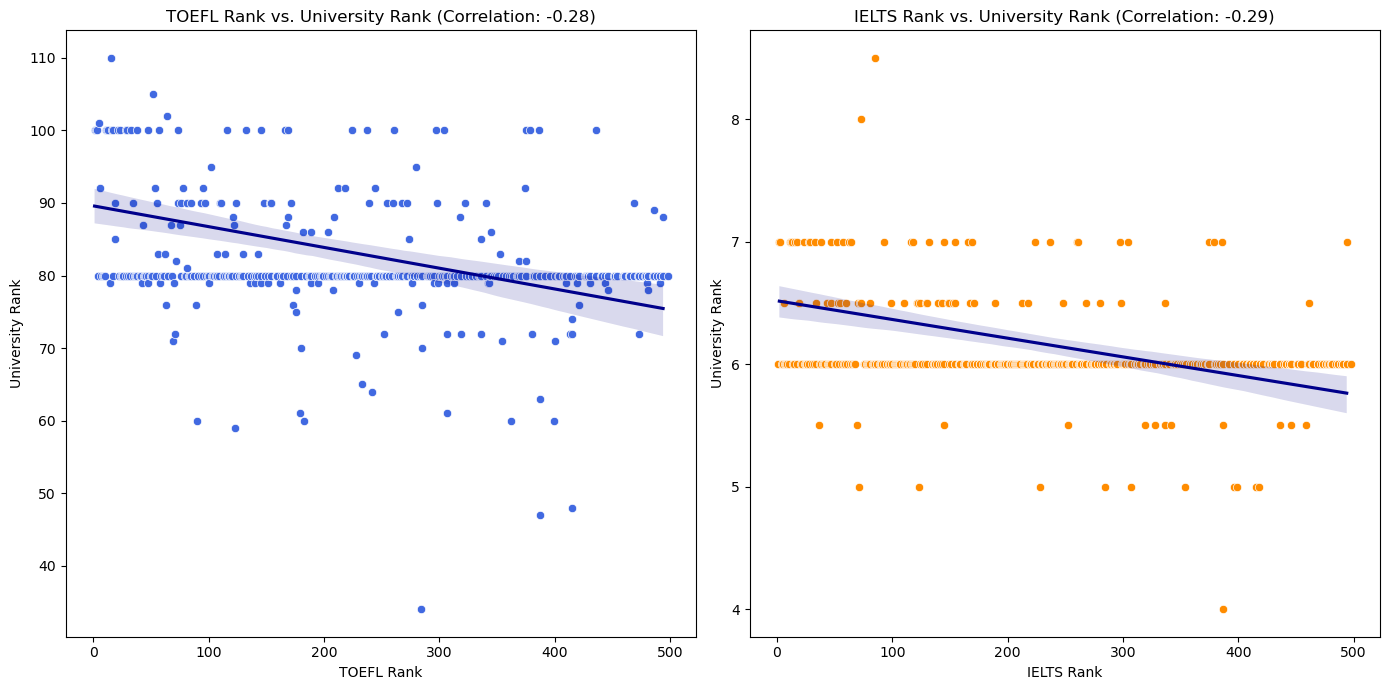

In [ ]:
df_correlation = df.copy()

df_correlation['TOEFL'].fillna(df_correlation['TOEFL'].median(), inplace=True)
df_correlation['IELTS'].fillna(df_correlation['IELTS'].median(), inplace=True)

correlation_toefl_uni_Rank = pearsonr(df_correlation['TOEFL'], df_correlation['Rank'])
correlation_ielts_uni_Rank = pearsonr(df_correlation['IELTS'], df_correlation['Rank'])

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

scatter_toefl = sns.scatterplot(data=df_correlation, y='TOEFL', x='Rank', ax=axes[0], color='royalblue')
sns.regplot(y='TOEFL', x='Rank', data=df, scatter=False, ax=scatter_toefl.axes, color='darkblue')
axes[0].set_title(f'TOEFL Rank vs. University Rank (Correlation: {correlation_toefl_uni_Rank[0]:.2f})')
axes[0].set_xlabel('TOEFL Rank')
axes[0].set_ylabel('University Rank')

scatter_ielts = sns.scatterplot(data=df_correlation, y='IELTS', x='Rank', ax=axes[1], color='darkorange')
sns.regplot(y='IELTS', x='Rank', data=df, scatter=False, ax=scatter_ielts.axes, color='darkblue')
axes[1].set_title(f'IELTS Rank vs. University Rank (Correlation: {correlation_ielts_uni_Rank[0]:.2f})')
axes[1].set_xlabel('IELTS Rank')
axes[1].set_ylabel('University Rank')

plt.tight_layout()

plt.show()

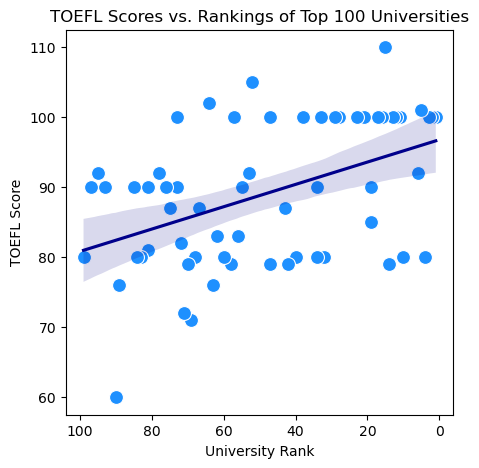

In [41]:
top_100_universities = df.nsmallest(100, 'Rank')

plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='TOEFL', data=top_100_universities, s=100, color='dodgerblue')

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='TOEFL', data=top_100_universities, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('TOEFL Scores vs. Rankings of Top 100 Universities')
plt.xlabel('University Rank')
plt.ylabel('TOEFL Score')

plt.show()

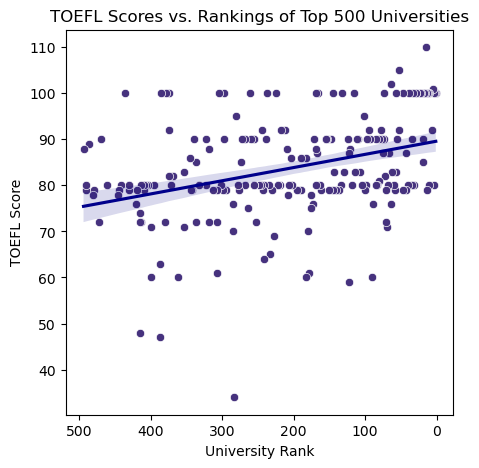

In [44]:
plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='TOEFL', data=df)

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='TOEFL', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('TOEFL Scores vs. Rankings of Top 500 Universities')
plt.xlabel('University Rank')
plt.ylabel('TOEFL Score')

plt.show()

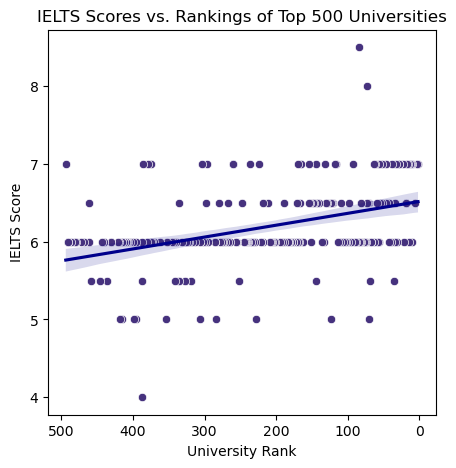

In [45]:
plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='IELTS', data=df)

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='IELTS', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('IELTS Scores vs. Rankings of Top 500 Universities')
plt.xlabel('University Rank')
plt.ylabel('IELTS Score')

plt.show()

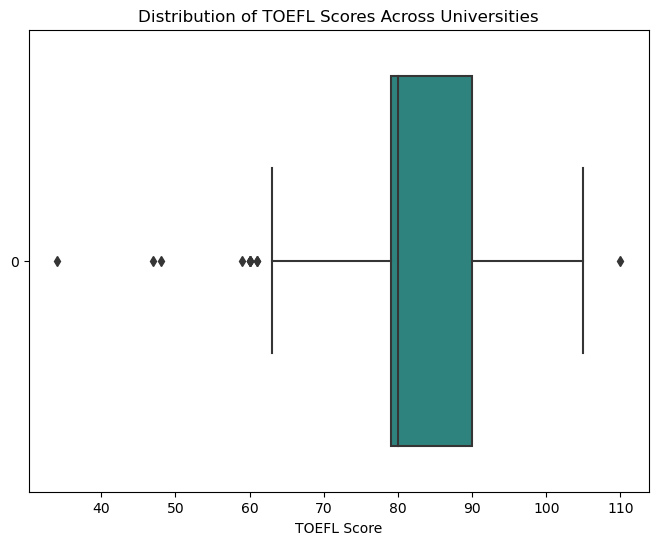

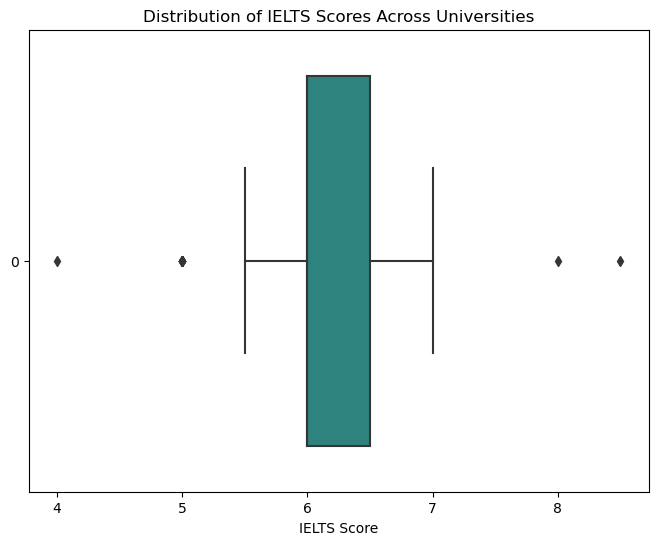

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['TOEFL'], palette="viridis", orient='h')
plt.title('Distribution of TOEFL Scores Across Universities')
plt.xlabel('TOEFL Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['IELTS'], palette="viridis", orient='h')
plt.title('Distribution of IELTS Scores Across Universities')
plt.xlabel('IELTS Score')
plt.show()

Bagaimana relasi antara jumlah mahasiswa dengan ranking dari universitas?

C:\Users\Nando\AppData\Local\Temp\ipykernel_14756\1704909145.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='Total Students', ci=None, palette='viridis')


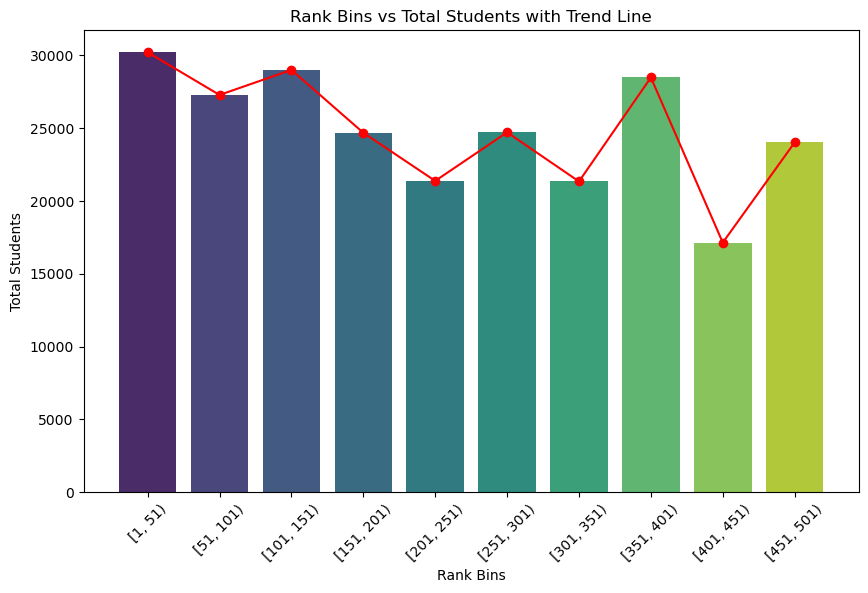

In [6]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['Total Students'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='Total Students', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['Total Students'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs Total Students with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('Total Students')

plt.show()

Apakah ranking universitas berpengaruh terhadap jumlah mahasiswa asing?

C:\Users\Nando\AppData\Local\Temp\ipykernel_6788\698174909.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='International Students', ci=None, palette='viridis')


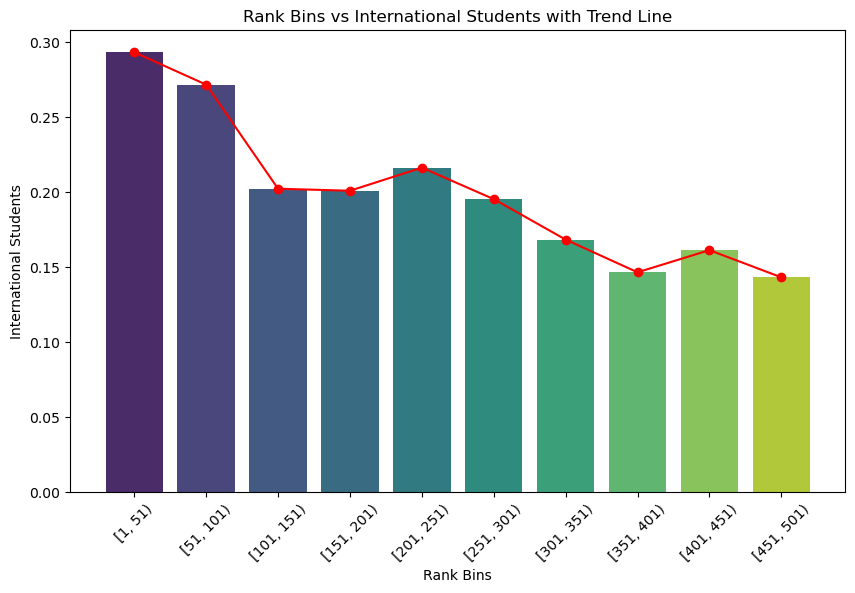

In [15]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['International Students'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='International Students', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['International Students'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs International Students with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('International Students')

plt.show()

Bagaimana distribusi jumlah mahasiswa di universitas top 500?

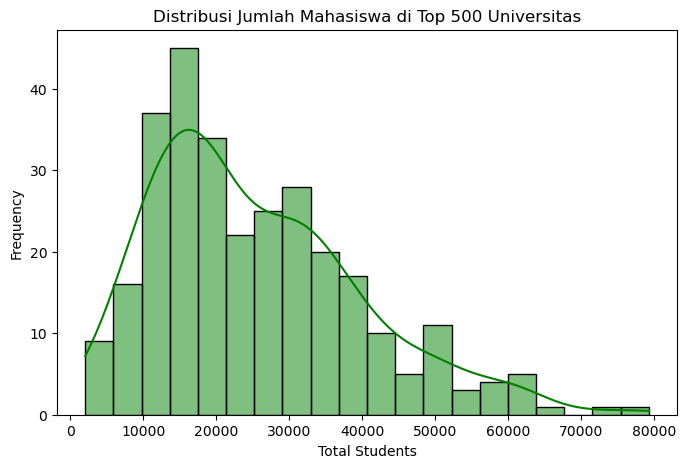

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Students'], bins=20, kde=True, color='green')
plt.title('Distribusi Jumlah Mahasiswa di Top 500 Universitas')
plt.xlabel('Total Students')
plt.ylabel('Frequency')
plt.show()

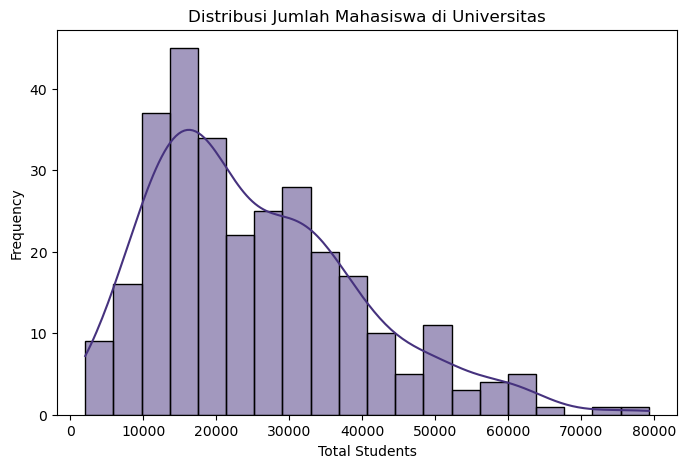

In [96]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Students'], bins=20, kde=True, palette='viridis')
plt.title('Distribusi Jumlah Mahasiswa di Universitas')
plt.xlabel('Total Students')
plt.ylabel('Frequency')
plt.show()

Bagaimana persebaran mahasiswa laki-laki dan perempuan pada universitas top 500 di dunia?

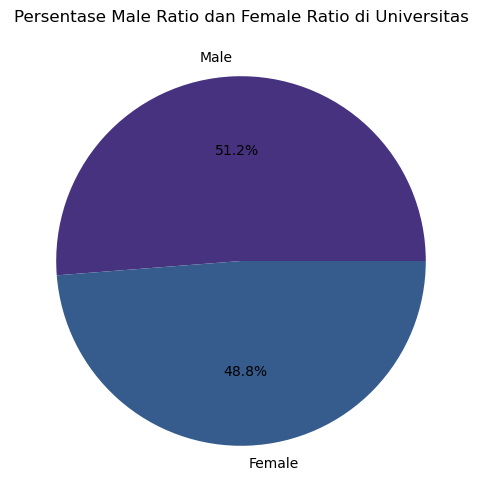

In [109]:
male_percentage = df['Male Ratio'].mean()
female_percentage = df['Female Ratio'].mean()

labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Male Ratio dan Female Ratio di Universitas')

plt.show()

Bagaimana persebaran mahasiswa laki-laki dan perempuan berdasarkan negara?

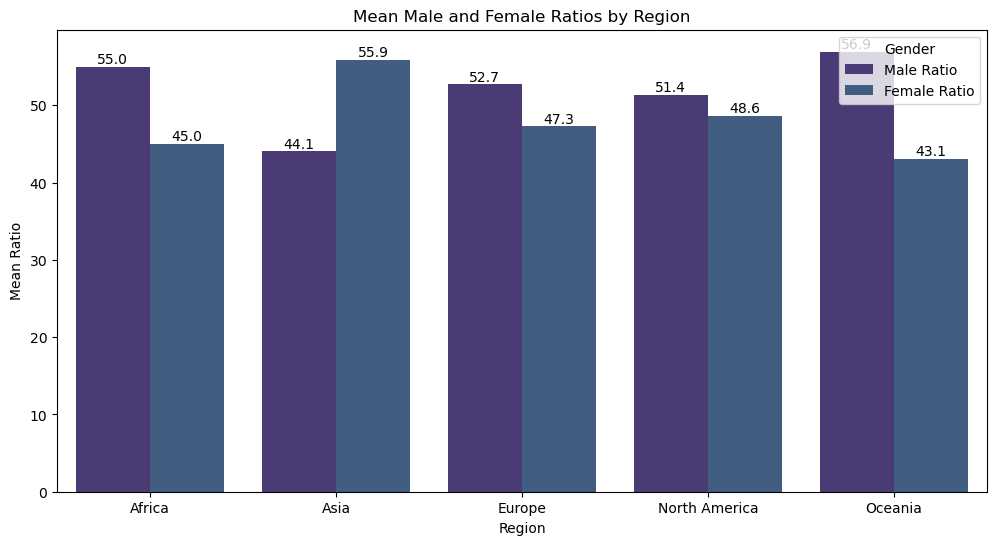

In [132]:
df_copy = df.copy()
df_copy = df.loc[df['Male Ratio'].notnull()]
df_copy = df.loc[df['Female Ratio'].notnull()]

mean_ratios_by_region = df_copy.groupby('Region').agg({
    'Male Ratio': 'mean',
    'Female Ratio': 'mean'
}).reset_index()

mean_ratios_melted = mean_ratios_by_region.melt(id_vars='Region', value_vars=['Male Ratio', 'Female Ratio'], 
                                                var_name='Gender', value_name='Mean Ratio')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_ratios_melted, x='Region', y='Mean Ratio', hue='Gender')

for p in ax.patches:
    value = round(p.get_height(), 1)
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Mean Male and Female Ratios by Region')
plt.xlabel('Region')
plt.ylabel('Mean Ratio')

plt.show()

Apakah universitas rankingnya tinggi memiliki jumlah prodi lebih banyak?

C:\Users\Nando\AppData\Local\Temp\ipykernel_6788\2033228876.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='Subjects Count', ci=None, palette='viridis')


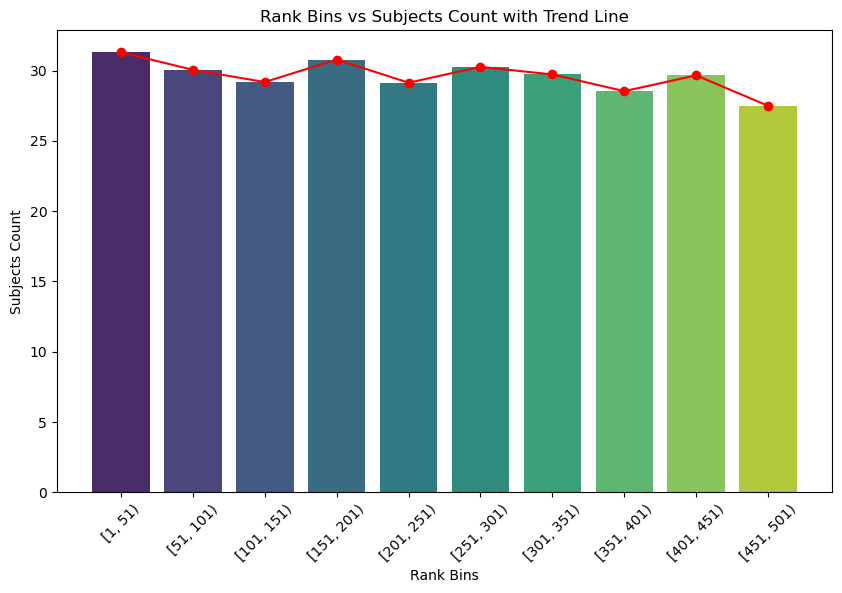

In [16]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['Subjects Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='Subjects Count', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['Subjects Count'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs Subjects Count with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('Subjects Count')

plt.show()

Berapa minimal skor akreditasi yang harus didapat oleh universitas agar masuk ke daftar top 500?

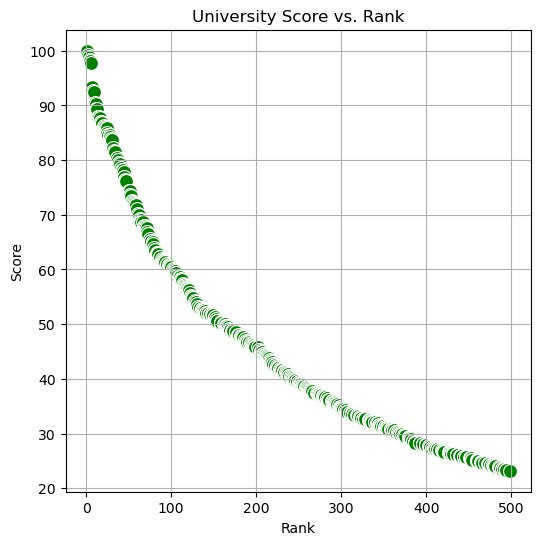

In [60]:
plt.figure(figsize=(6, 6))
scatterplot = sns.scatterplot(x='Rank', y='Score', data=df, s=100, color='green')

plt.title('University Score vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Score')

plt.grid(True)
plt.show()

Benua apa yang memiliki rata-rata skor akreditasi tertinggi?

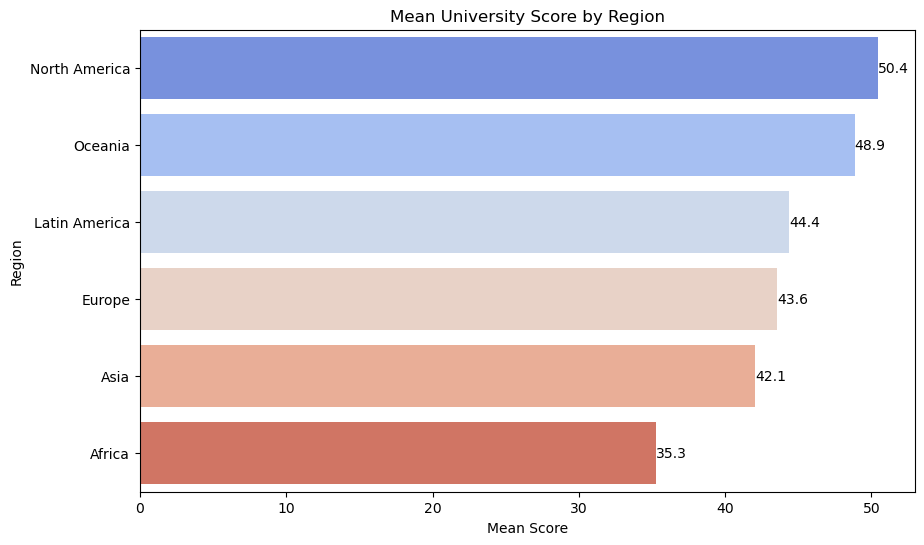

In [63]:
mean_score_by_region = df.groupby('Region')['Score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Score', y='Region', data=mean_score_by_region)

for index, value in enumerate(mean_score_by_region['Score']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University Score by Region')
plt.xlabel('Mean Score')
plt.ylabel('Region')

plt.show()

Apa saja universitas di Indonesia yang masuk ke daftar top 500?

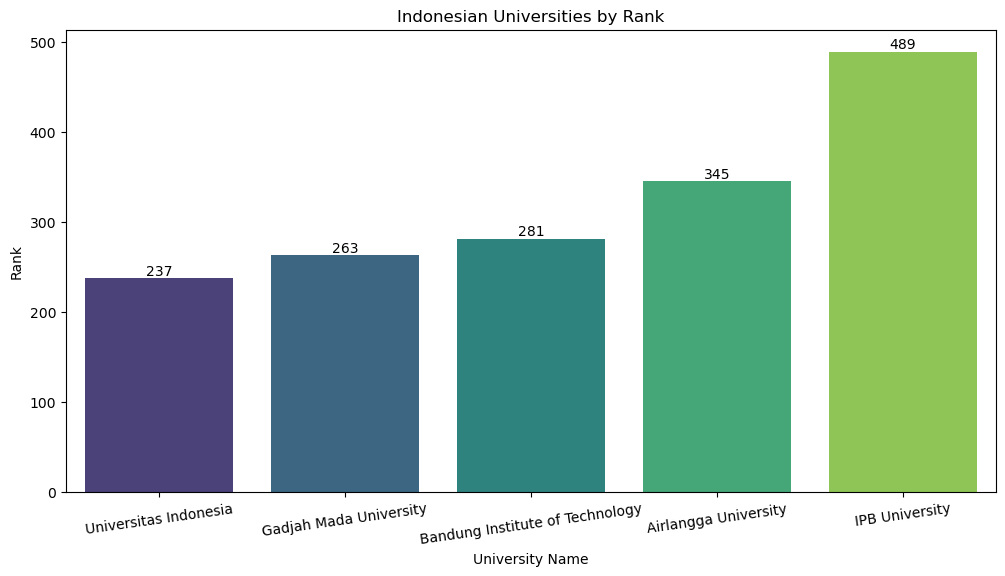

In [135]:
indonesia_universities = df[df['Country'] == 'Indonesia']

indonesia_universities_sorted = indonesia_universities.sort_values('Rank')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=indonesia_universities_sorted, x='University', y='Rank', palette='viridis')

for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Indonesian Universities by Rank')
plt.xticks(rotation=8)
plt.xlabel('University Name')
plt.ylabel('Rank')

plt.show()

Benua dan negara apa yang mahasiswanya memiliki skor TOEFL dan IELTS tertinggi?

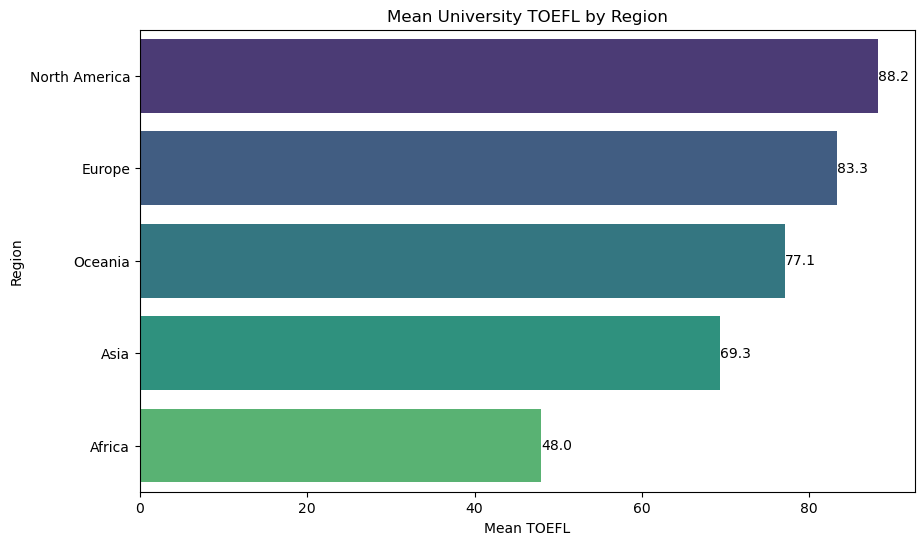

In [113]:
df_copy = df.copy()
df_copy = df.loc[df['TOEFL'].notnull()]
mean_TOEFL_by_region = df_copy.groupby('Region')['TOEFL'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='TOEFL', y='Region', data=mean_TOEFL_by_region)

for index, value in enumerate(mean_TOEFL_by_region['TOEFL']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University TOEFL by Region')
plt.xlabel('Mean TOEFL')
plt.ylabel('Region')

plt.show()

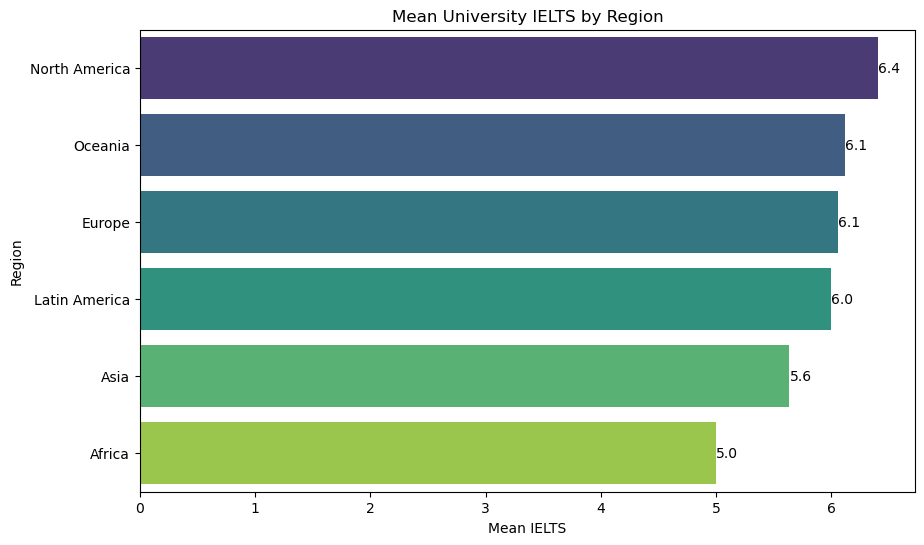

In [84]:
mean_IELTS_by_region = df.groupby('Region')['IELTS'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='IELTS', y='Region', data=mean_IELTS_by_region)

for index, value in enumerate(mean_IELTS_by_region['IELTS']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University IELTS by Region')
plt.xlabel('Mean IELTS')
plt.ylabel('Region')

plt.show()

Benua apa yang memiliki rata-rata mahasiswa asing terbanyak?

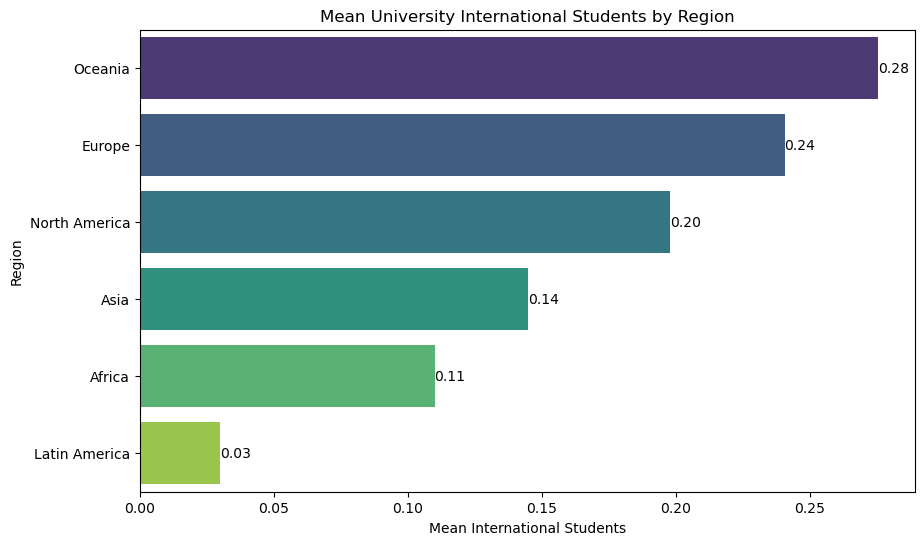

In [94]:
mean_International_Students_by_region = df.groupby('Region')['International Students'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='International Students', y='Region', data=mean_International_Students_by_region)

for index, value in enumerate(mean_International_Students_by_region['International Students']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Mean University International Students by Region')
plt.xlabel('Mean International Students')
plt.ylabel('Region')

plt.show()

Bagaimana distribusi peringkat kelayakan kerja alumni pada universitas top 500?

C:\Users\Nando\AppData\Local\Temp\ipykernel_32572\2655906948.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Alumni Employability Rank'], bins=30, kde=True, palette='viridis')


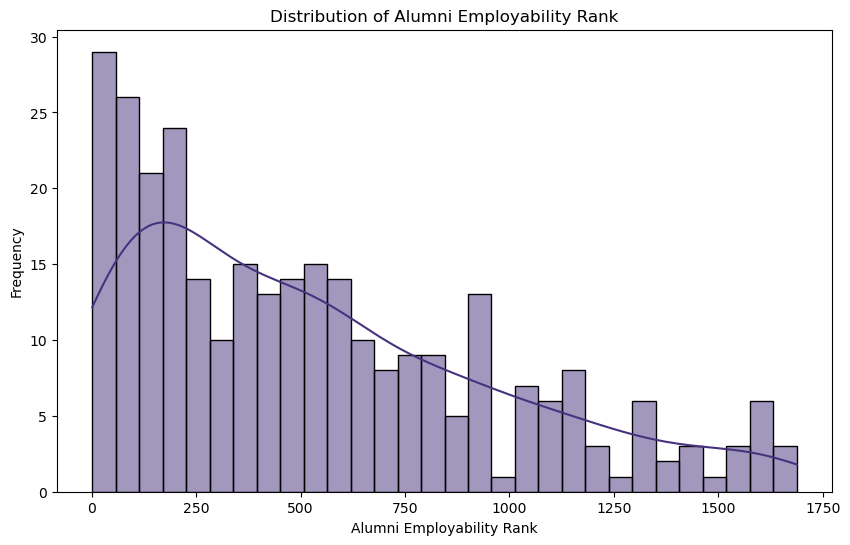

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Alumni Employability Rank'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Alumni Employability Rank')
plt.xlabel('Alumni Employability Rank')
plt.ylabel('Frequency')
plt.show()

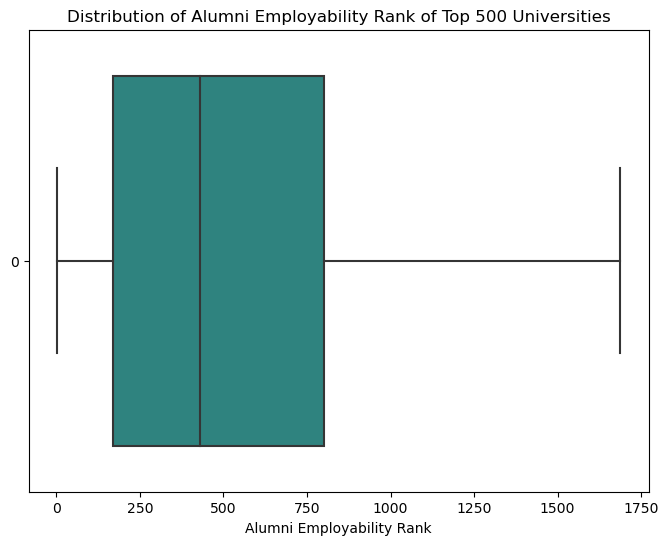

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Alumni Employability Rank'], palette="viridis", orient='h')
plt.title('Distribution of Alumni Employability Rank of Top 500 Universities')
plt.xlabel('Alumni Employability Rank')
plt.show()

Bagaimana korelasi antara peringkat kelayakan kerja alumni dengan peringkat universitas?

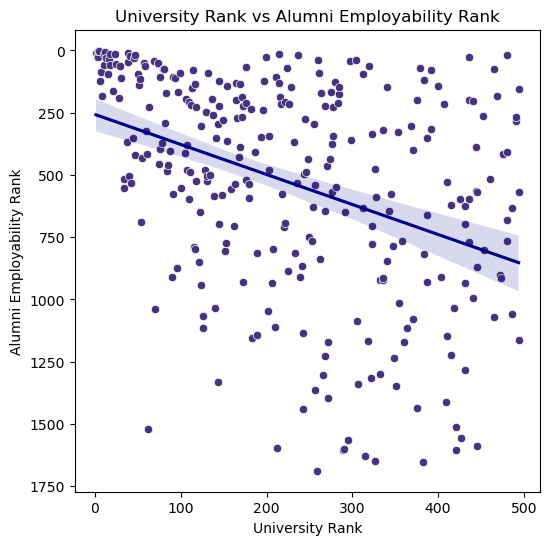

In [29]:
plt.figure(figsize=(6, 6))
scatterplot = sns.scatterplot(x='Rank', y='Alumni Employability Rank', data=df)

plt.gca().invert_yaxis()

sns.regplot(x='Rank', y='Alumni Employability Rank', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('University Rank vs Alumni Employability Rank')
plt.xlabel('University Rank')
plt.ylabel('Alumni Employability Rank')

plt.show()

Negara apa yang memiliki rata-rata peringkat kelayakan kerja alumni tertinggi?

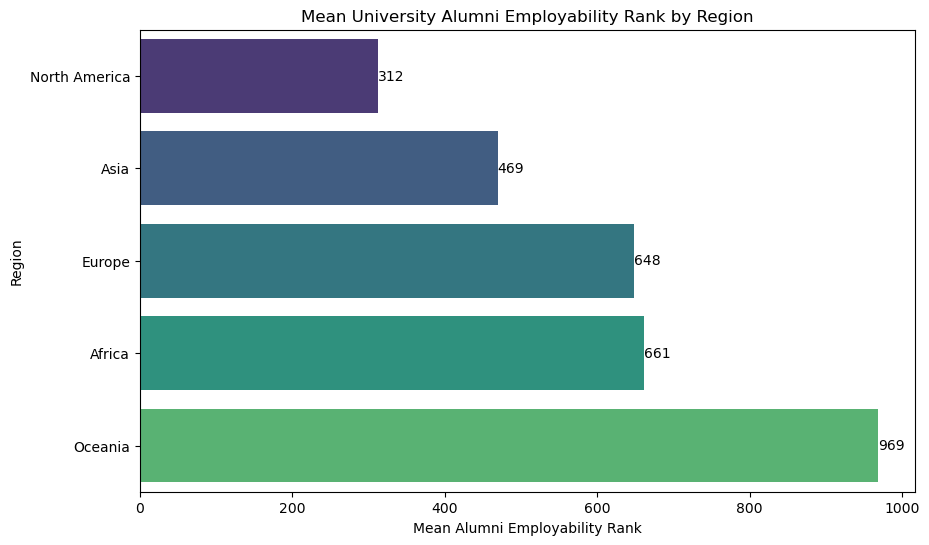

In [40]:
mean_International_Students_by_region = df.groupby('Region')['Alumni Employability Rank'].mean().sort_values(ascending=True).reset_index()
mean_International_Students_by_region = mean_International_Students_by_region[mean_International_Students_by_region['Region'] != 'Latin America']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Alumni Employability Rank', y='Region', data=mean_International_Students_by_region)

for index, value in enumerate(mean_International_Students_by_region['Alumni Employability Rank']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.title('Mean University Alumni Employability Rank by Region')
plt.xlabel('Mean Alumni Employability Rank')
plt.ylabel('Region')

plt.show()